In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        (os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

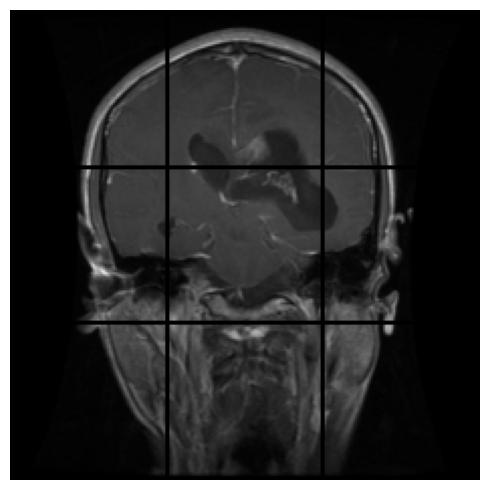

✅ ViT 3x3 patch figure saved!
📂 Path: /kaggle/working/vit_9patches.png


In [2]:
import torch
import torchvision.transforms as T
from torchvision.utils import make_grid
from PIL import Image
import matplotlib.pyplot as plt
import os


IMAGE_PATH = "/kaggle/input/brain-tumor-mri-dataset/Training/glioma/Tr-glTr_0004.jpg"
SAVE_PATH  = "/kaggle/working/vit_9patches.png"
PATCH_SIZE = 75   # 225 / 3
GRID_SIZE  = 3    # 3x3 patches

os.makedirs("/kaggle/working", exist_ok=True)


transform = T.Compose([
    T.Resize((225, 225)),  # must be divisible by 3
    T.ToTensor()
])

to_pil = T.ToPILImage()

# ---------- LOAD IMAGE ----------
img = Image.open(IMAGE_PATH).convert("RGB")
img_tensor = transform(img)   # (3,225,225)

# ---------- CREATE 9 PATCHES ----------
patches = img_tensor.unfold(1, PATCH_SIZE, PATCH_SIZE)\
                    .unfold(2, PATCH_SIZE, PATCH_SIZE)
patches = patches.permute(1,2,0,3,4).contiguous()
patches = patches.view(-1, 3, PATCH_SIZE, PATCH_SIZE)  # (9,3,75,75)

# ---------- MAKE GRID FIGURE ----------
grid = make_grid(patches, nrow=GRID_SIZE, padding=2)

# ---------- SAVE FIGURE AS PNG ----------
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(to_pil(grid))
ax.axis('off')
plt.tight_layout()
plt.savefig(SAVE_PATH, dpi=150)
plt.show()

print("✅ ViT 3x3 patch figure saved!")
print("📂 Path:", SAVE_PATH)


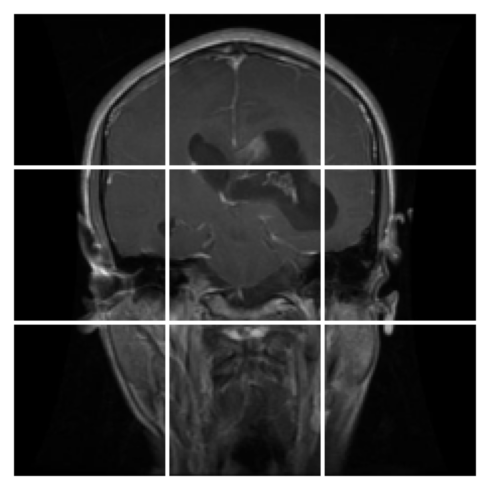

✅ ViT 3x3 patch figure with white padding saved!
📂 Path: /kaggle/working/vit_9patches_white.png


In [3]:
import torch
import torchvision.transforms as T
from torchvision.utils import make_grid
from PIL import Image
import matplotlib.pyplot as plt
import os

# ---------- CONFIG ----------
IMAGE_PATH = "/kaggle/input/brain-tumor-mri-dataset/Training/glioma/Tr-glTr_0004.jpg"
SAVE_PATH  = "/kaggle/working/vit_9patches_white.png"
PATCH_SIZE = 75
GRID_SIZE  = 3

os.makedirs("/kaggle/working", exist_ok=True)

# ---------- TRANSFORM ----------
transform = T.Compose([
    T.Resize((225, 225)),
    T.ToTensor()
])

to_pil = T.ToPILImage()

# ---------- LOAD IMAGE ----------
img = Image.open(IMAGE_PATH).convert("RGB")
img_tensor = transform(img)   # (3,225,225)

# ---------- CREATE 9 PATCHES ----------
patches = img_tensor.unfold(1, PATCH_SIZE, PATCH_SIZE)\
                    .unfold(2, PATCH_SIZE, PATCH_SIZE)
patches = patches.permute(1,2,0,3,4).contiguous()
patches = patches.view(-1, 3, PATCH_SIZE, PATCH_SIZE)  # (9,3,75,75)

# ---------- MAKE GRID FIGURE WITH WHITE PADDING ----------
grid = make_grid(patches, nrow=GRID_SIZE, padding=2, pad_value=1.0)  # white padding

# ---------- SAVE FIGURE AS PNG ----------
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(to_pil(grid))
ax.axis('off')
plt.tight_layout()
plt.savefig(SAVE_PATH, dpi=150)
plt.show()

print("✅ ViT 3x3 patch figure with white padding saved!")
print("📂 Path:", SAVE_PATH)
